In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [3]:
data = pd.read_csv(".\data\Olympic Hero.csv")
data.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [5]:
data.rename(columns={'Total':'Total_Medals'}, inplace=True)
data.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


# figure out which olympic event does a country perform better in

In [9]:
data['Better_Event'] = np.where(data['Total_Summer']>data['Total_Winter'],'Summer',np.where(data['Total_Summer']<data['Total_Winter'],'Winter','Both'))
data.head(5)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Summer
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Summer
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Summer
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Summer
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Summer


In [10]:
better_event = data['Better_Event'].value_counts().idxmax()
better_event

'Summer'

# to finding out the best performing countries across all events

In [11]:
top_countries = data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]
top_countries.head()

,Country_Name,Total_Summer,Total_Winter,Total_Medals
0,Afghanistan,2,0,2
1,Algeria,15,0,15
2,Argentina,70,0,70
3,Armenia,12,0,12
4,Australasia,12,0,12


In [13]:
top_countries.drop(top_countries.index[len(top_countries)-1],inplace=True)
top_countries.tail(1)

,Country_Name,Total_Summer,Total_Winter,Total_Medals
144,Zimbabwe,8,0,8


In [15]:
def top_ten(df,column):
    country_list = []
    country_list = list(df.nlargest(10,column)['Country_Name'])
    return country_list

top_10_summer = top_ten(top_countries,'Total_Summer')
print("\n top_10_summer: ", top_10_summer)

top_10_winter = top_ten(top_countries,'Total_Winter')
print("\n top_10_Winter: ",top_10_winter)

top_10 = top_ten(top_countries,'Total_Medals')
print("\n top_10: ",top_10)

common = list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print("\n common: ",common)



 top_10_summer:  ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia']

 top_10_Winter:  ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia']

 top_10:  ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia']

 common:  ['United States', 'Soviet Union', 'Germany', 'Sweden']


# plot the medal count of the top 10 countries for better visualisation

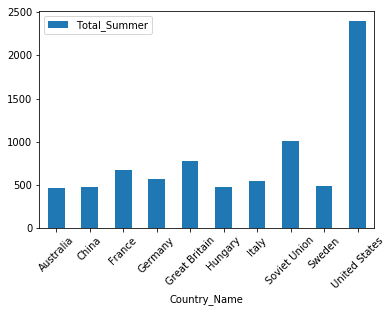

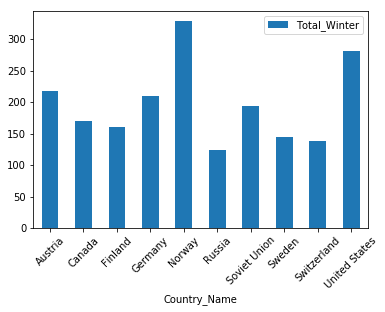

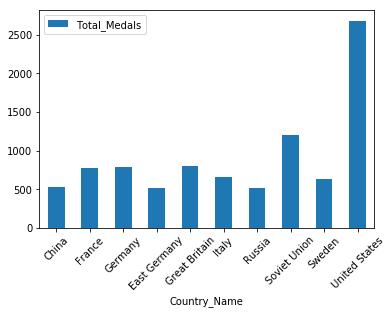

In [21]:

summer_df = data[data['Country_Name'].isin(top_10_summer)]
winter_df = data[data['Country_Name'].isin(top_10_winter)]
top_df = data[data['Country_Name'].isin(top_10)]

ax = summer_df.plot.bar(x='Country_Name', y='Total_Summer', rot=45)
ax1 = winter_df.plot.bar(x='Country_Name', y='Total_Winter', rot=45)
ax2 = top_df.plot.bar(x='Country_Name', y='Total_Medals',rot=45)

# Top performing country(Gold)

In [26]:
summer_df['Golden_Ratio'] = summer_df['Gold_Summer']/summer_df['Total_Summer']
summer_max_ratio = summer_df['Golden_Ratio'].max()
summer_country_gold = summer_df.ix[summer_df['Golden_Ratio'].idxmax(),'Country_Name']
summer_max_ratio, summer_country_gold

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


(0.4249471458773784, 'China')

In [27]:

winter_df['Golden_Ratio'] = winter_df['Gold_Winter']/winter_df['Total_Winter']
winter_max_ratio = winter_df['Golden_Ratio'].max()
winter_country_gold = winter_df.ix[winter_df['Golden_Ratio'].idxmax(), 'Country_Name']
winter_max_ratio, winter_country_gold


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


(0.4020618556701031, 'Soviet Union')

In [28]:

top_df['Golden_Ratio'] = top_df['Gold_Total']/top_df['Total_Medals']
top_max_ratio = top_df['Golden_Ratio'].max()
top_country_gold = top_df.ix[top_df['Golden_Ratio'].idxmax(), 'Country_Name']
top_max_ratio, top_country_gold

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


(0.4049429657794677, 'China')

# Best in the world
###### Winning Gold is great but is winning most gold equivalent to being the best overall perfomer? Let's find out.

In [34]:
data_1 = data.drop(data.index[len(data)-1])

data_1['Total_Points'] = (data_1['Gold_Total']*3)+(data_1['Silver_Total']*2) + (data_1['Bronze_Total']*1)
data_1.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event,Total_Points
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Summer,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Summer,27
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Summer,130
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Summer,16
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Summer,22


In [36]:
most_points = data_1['Total_Points'].max()
print('most_points: ', most_points)

best_country = data_1.ix[data_1['Total_Points'].idxmax(), 'Country_Name']
print('best_country: ', best_country)

most_points:  5684
best_country:  United States


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


# Bar Plot for the best

     Gold_Total  Silver_Total  Bronze_Total
135        1072           859           750


(array([0]), <a list of 1 Text xticklabel objects>)

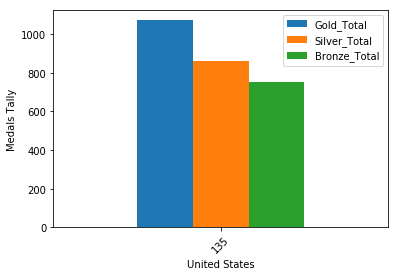

In [37]:
best = data[data['Country_Name'] == best_country]

best = best[['Gold_Total','Silver_Total','Bronze_Total']]
print(best)

best.plot.bar()
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)
